In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score,confusion_matrix,classification_report, roc_auc_score, average_precision_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
import pickle

In [27]:
df = pd.read_csv('Financial_inclusion_dataset.csv')
print('DATA OVERVIEW :')
print('DATA INFO:')
print(df.info())
print('----------------------------------------------------------------------------------------')
print(f'DUPLICATES: {df.duplicated().sum()}')
print('----------------------------------------------------------------------------------------')
print ('MISSING VALUES :')
print( df.isna().sum())

DATA OVERVIEW :
DATA INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None
----------------------------

In [28]:
df = df.drop('uniqueid',axis=1)

In [29]:
df

country  year bank_account location_type cellphone_access  \
0       Kenya  2018          Yes         Rural              Yes   
1       Kenya  2018           No         Rural               No   
2       Kenya  2018          Yes         Urban              Yes   
3       Kenya  2018           No         Rural              Yes   
4       Kenya  2018           No         Urban               No   
...       ...   ...          ...           ...              ...   
23519  Uganda  2018           No         Rural              Yes   
23520  Uganda  2018           No         Rural              Yes   
23521  Uganda  2018           No         Rural              Yes   
23522  Uganda  2018           No         Urban              Yes   
23523  Uganda  2018           No         Rural              Yes   

       household_size  age_of_respondent gender_of_respondent  \
0                   3                 24               Female   
1                   5                 70               Female   
2                   5                 26                 Male   
3                   5                 34               Female   
4                   8                 26                 Male   
...               ...                ...                  ...   
23519               4                 48               Female   
23520               2                 27               Female   
23521               5                 27               Female   
23522               7                 30               Female   
23523              10                 20                 Male   

      relationship_with_head           marital_status  \
0                     Spouse  Married/Living together   
1          Head of Household                  Widowed   
2             Other relative     Single/Never Married   
3          Head of Household  Married/Living together   
4                      Child     Single/Never Married   
...                      ...                      ...   
23519      Head of Household       Divorced/Seperated   
23520      Head of Household     Single/Never Married   
23521                 Parent                  Widowed   
23522                 Parent       Divorced/Seperated   
23523                  Child     Single/Never Married   

                       education_level                   job_type  
0                  Secondary education              Self employed  
1                  No formal education       Government Dependent  
2      Vocational/Specialised training              Self employed  
3                    Primary education  Formally employed Private  
4                    Primary education        Informally employed  
...                                ...                        ...  
23519              No formal education               Other Income  
23520              Secondary education               Other Income  
23521                Primary education               Other Income  
23522              Secondary education              Self employed  
23523              Secondary education                  No Income  

[23524 rows x 12 columns]

In [14]:
df.describe()

year  household_size  age_of_respondent
count  23524.000000    23524.000000       23524.000000
mean    2016.975939        3.797483          38.805220
std        0.847371        2.227613          16.520569
min     2016.000000        1.000000          16.000000
25%     2016.000000        2.000000          26.000000
50%     2017.000000        3.000000          35.000000
75%     2018.000000        5.000000          49.000000
max     2018.000000       21.000000         100.000000

In [30]:
data_cat= df.select_dtypes(include="object").columns
data_num = df.select_dtypes(include='number').columns


country:
country
Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: count, dtype: int64


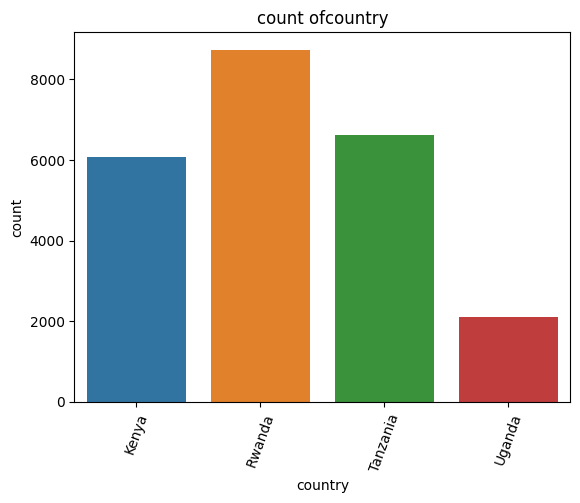


bank_account:
bank_account
No     20212
Yes     3312
Name: count, dtype: int64


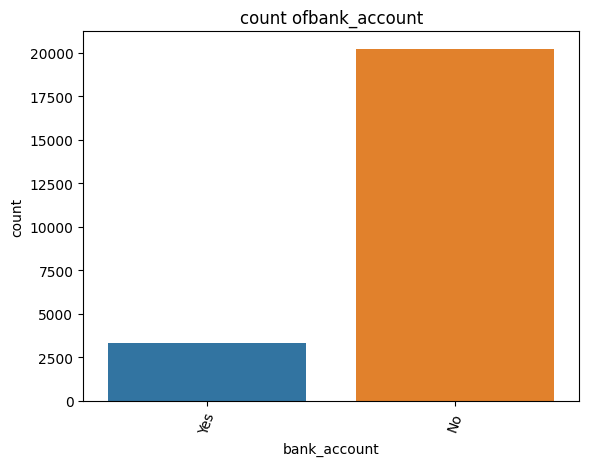


location_type:
location_type
Rural    14343
Urban     9181
Name: count, dtype: int64


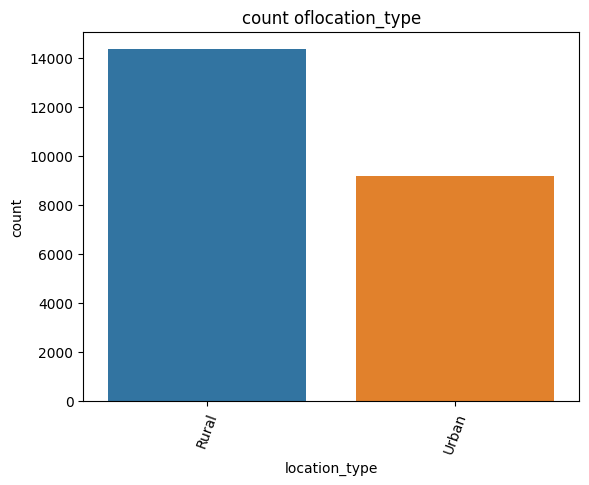


cellphone_access:
cellphone_access
Yes    17454
No      6070
Name: count, dtype: int64


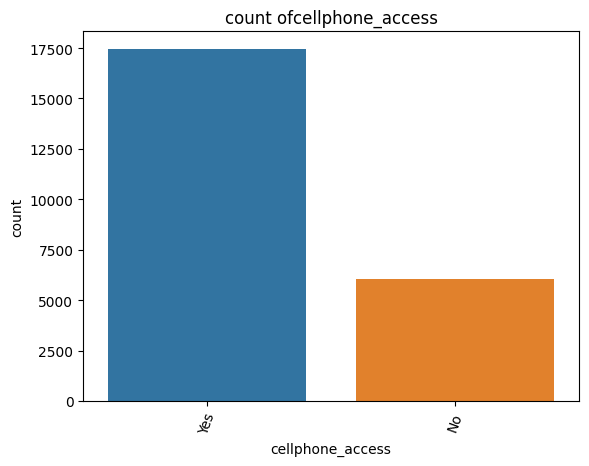


gender_of_respondent:
gender_of_respondent
Female    13877
Male       9647
Name: count, dtype: int64


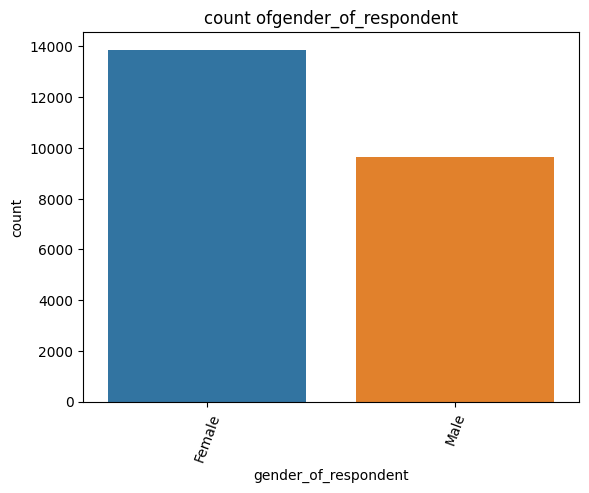


relationship_with_head:
relationship_with_head
Head of Household      12831
Spouse                  6520
Child                   2229
Parent                  1086
Other relative           668
Other non-relatives      190
Name: count, dtype: int64


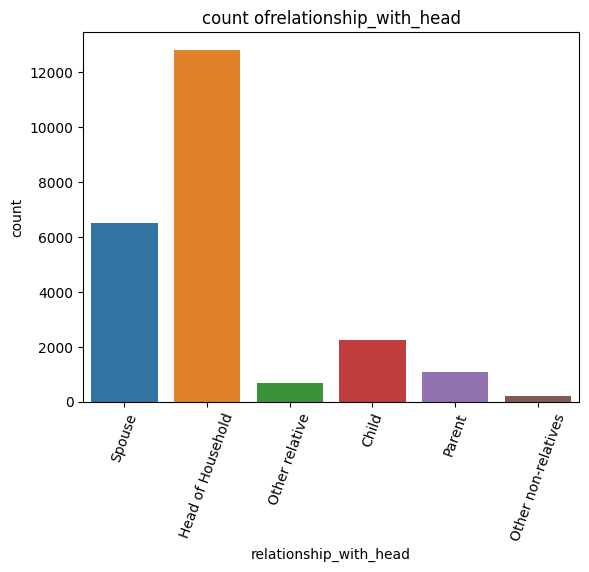


marital_status:
marital_status
Married/Living together    10749
Single/Never Married        7983
Widowed                     2708
Divorced/Seperated          2076
Dont know                      8
Name: count, dtype: int64


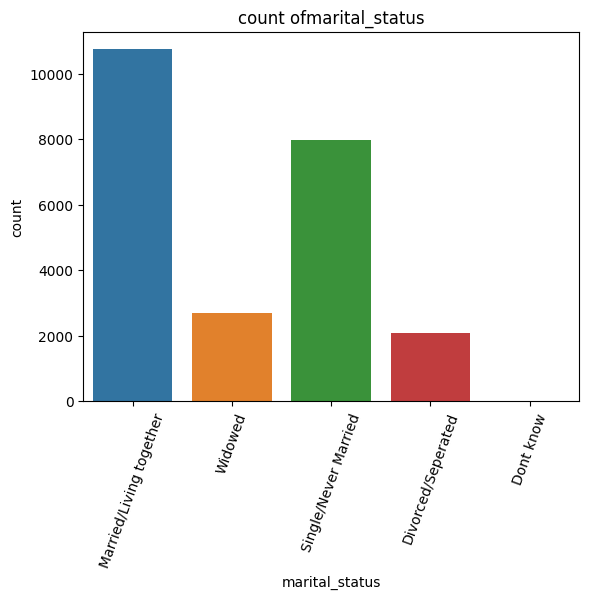


education_level:
education_level
Primary education                  12791
No formal education                 4515
Secondary education                 4223
Tertiary education                  1157
Vocational/Specialised training      803
Other/Dont know/RTA                   35
Name: count, dtype: int64


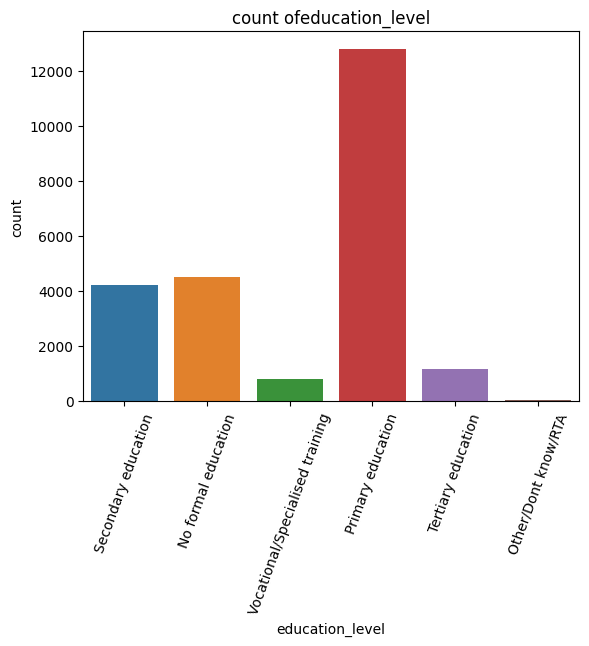


job_type:
job_type
Self employed                   6437
Informally employed             5597
Farming and Fishing             5441
Remittance Dependent            2527
Other Income                    1080
Formally employed Private       1055
No Income                        627
Formally employed Government     387
Government Dependent             247
Dont Know/Refuse to answer       126
Name: count, dtype: int64


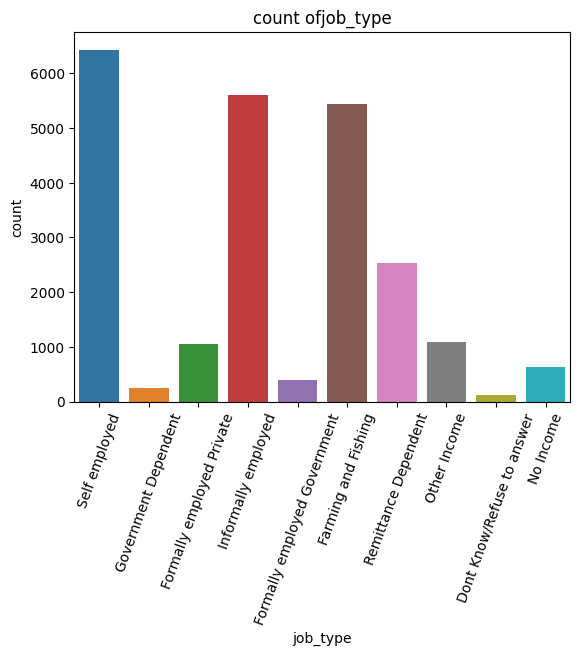

In [16]:
for i in data_cat:
  print(f'\n{i}:')
  print(df[i].value_counts())
  sns.countplot(data=df,x=i, hue=i)
  plt.title(f"count of{i}")
  plt.xticks(rotation = 70)
  plt.show()

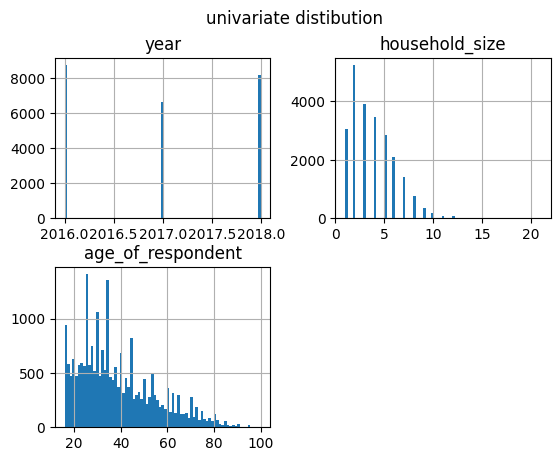

In [17]:
df[data_num].hist(bins=75)
plt.suptitle("univariate distibution")
plt.show()

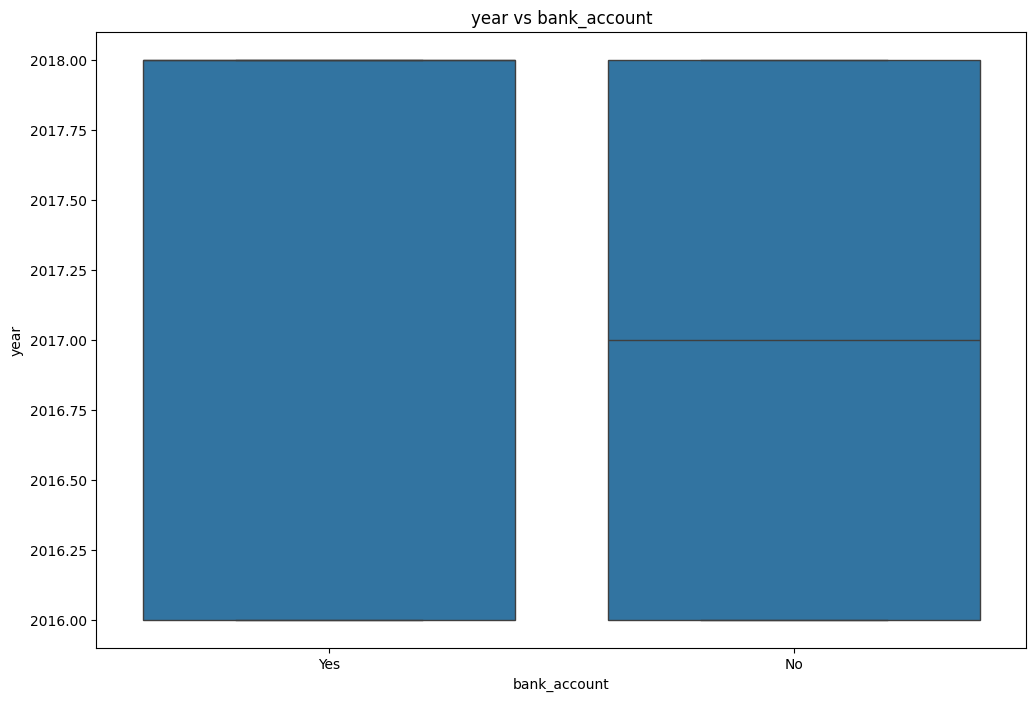

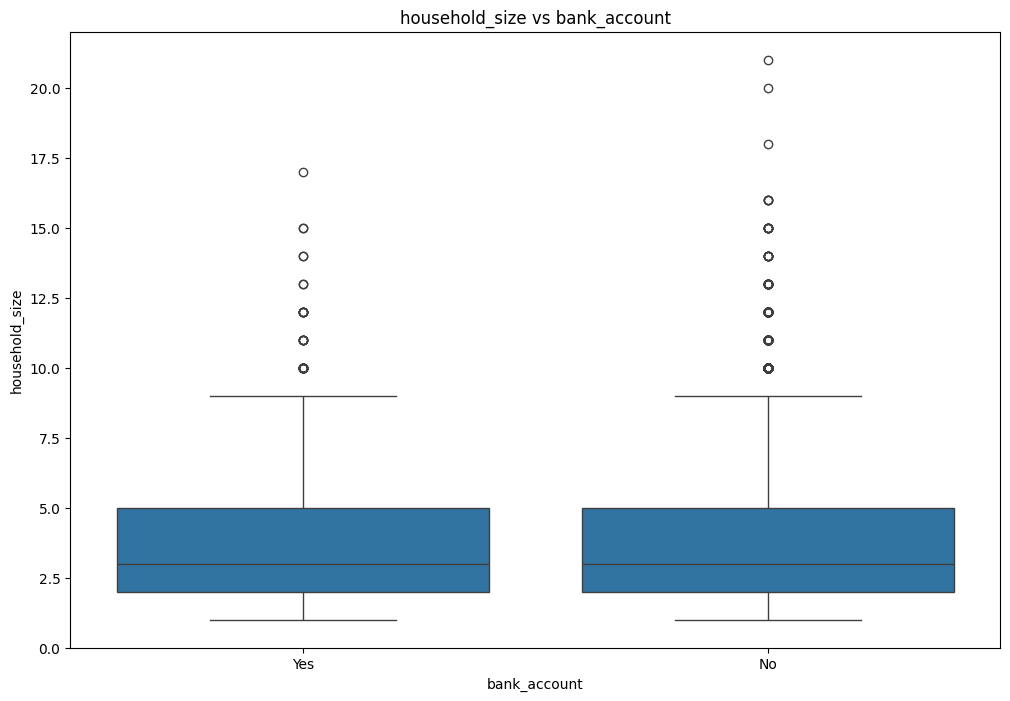

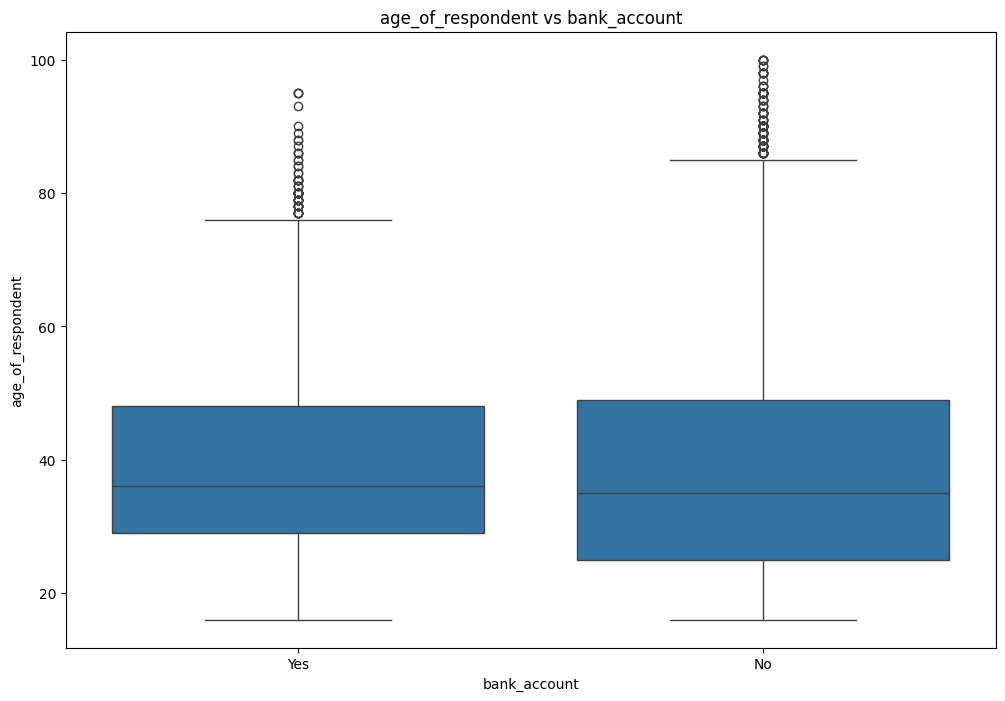

In [18]:
for i in data_num :
 plt.figure(figsize=(12,8))
 sns.boxplot(x=df["bank_account"],y=df[i])
 plt.title(f'{i} vs bank_account')
 plt.show()

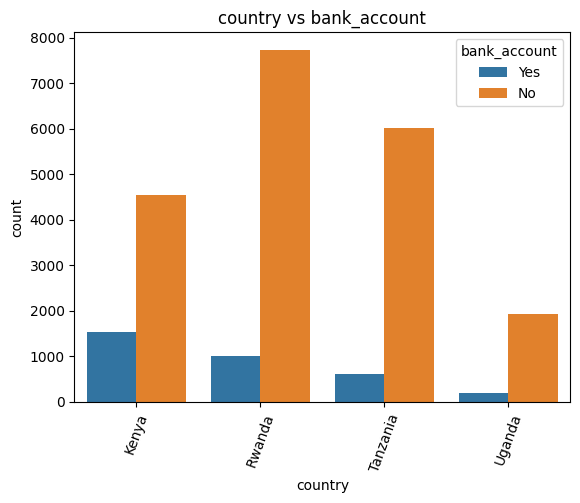

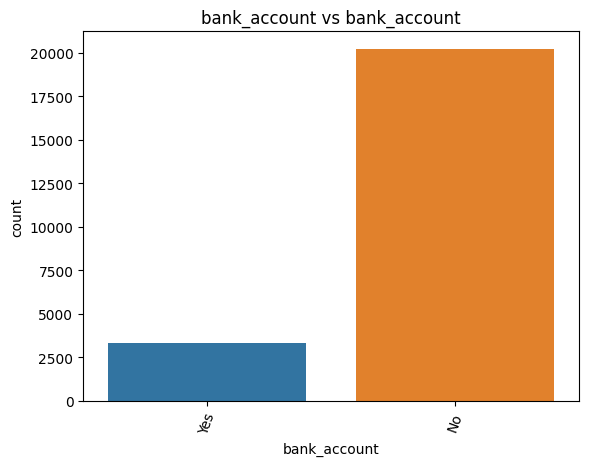

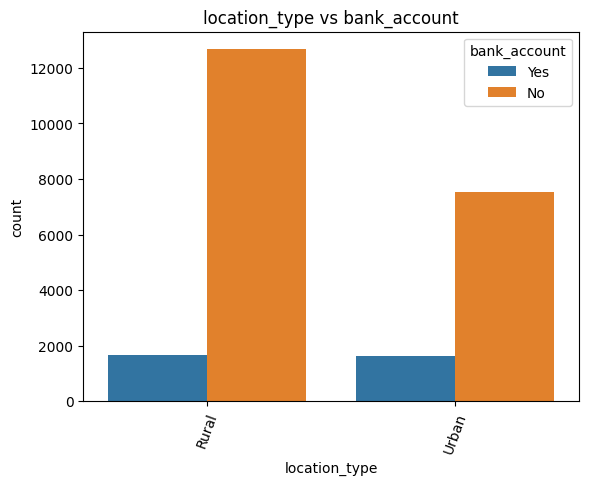

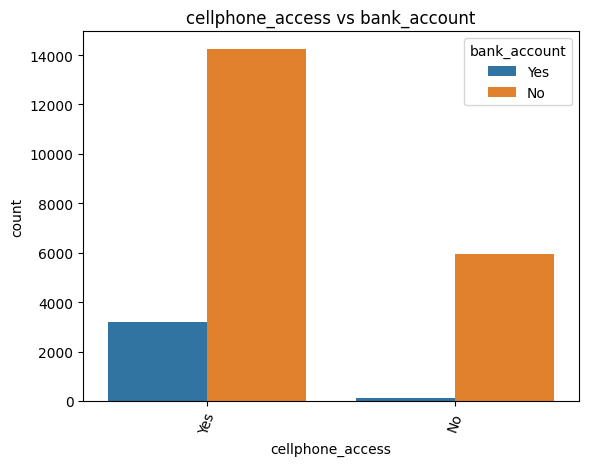

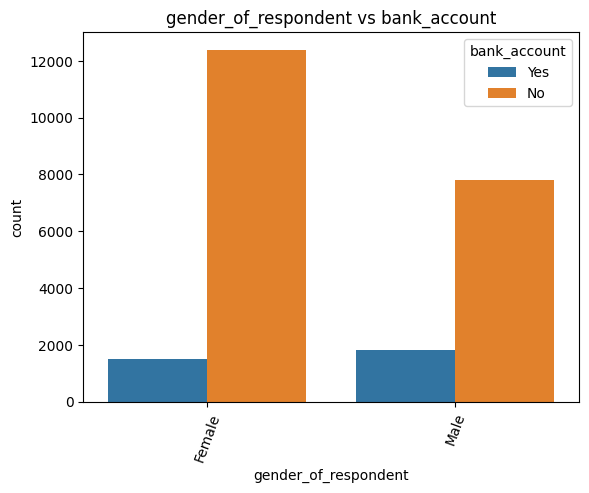

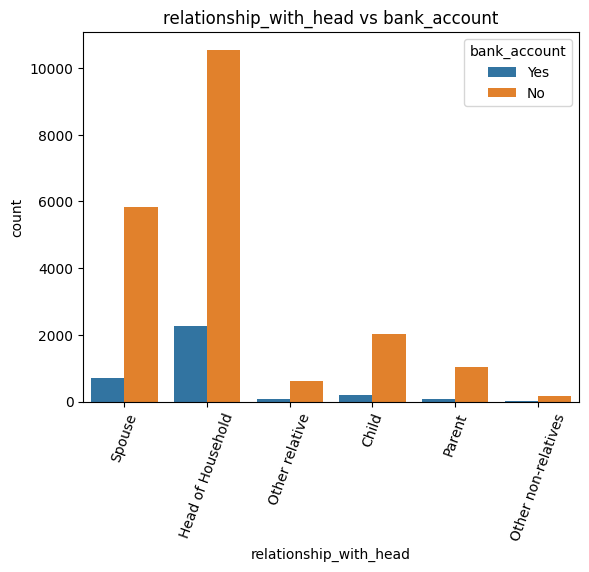

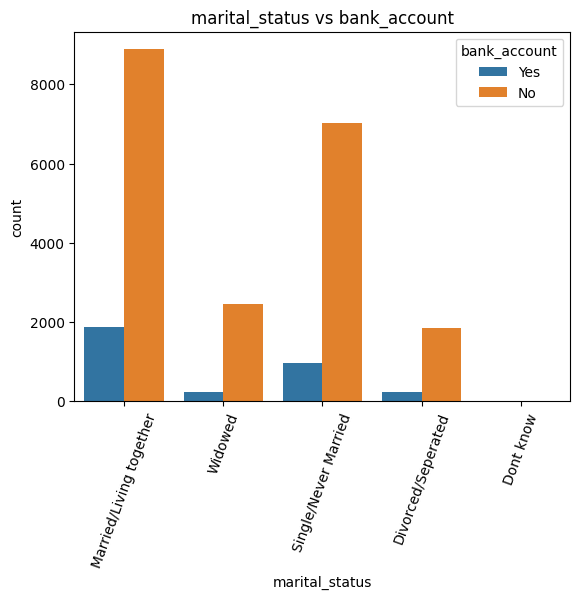

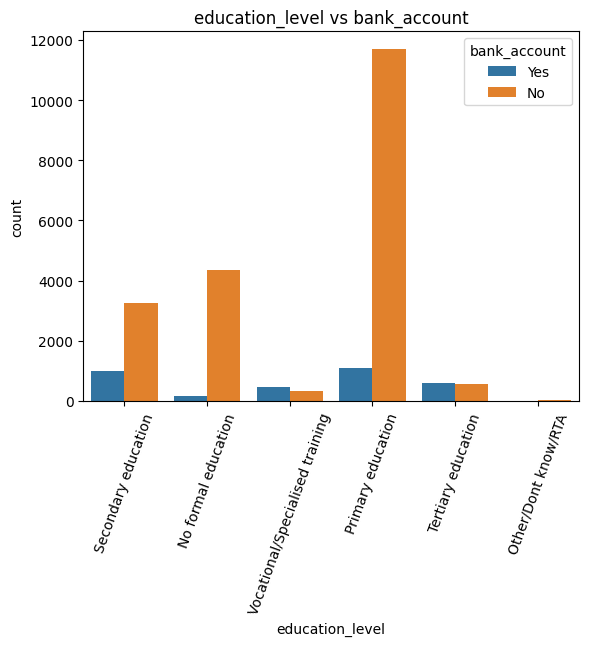

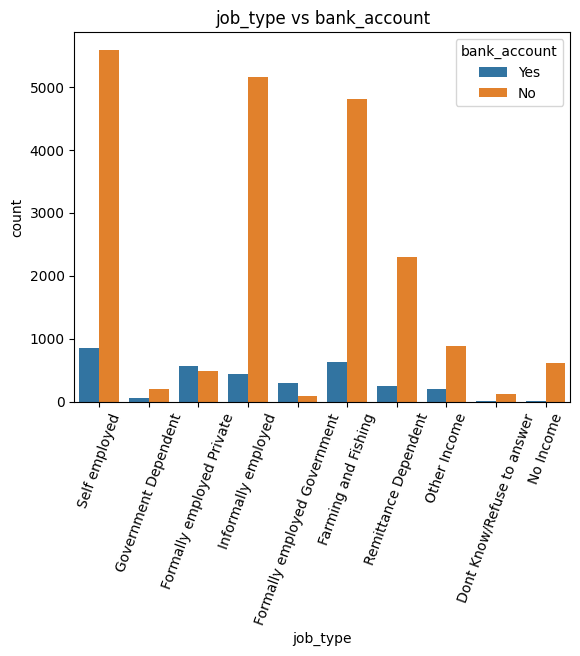

In [19]:
for i in data_cat :
  sns.countplot(data=df ,x=i, hue="bank_account")
  plt.title(f'{i} vs bank_account')
  plt.xticks(rotation = 70)
  plt.show()

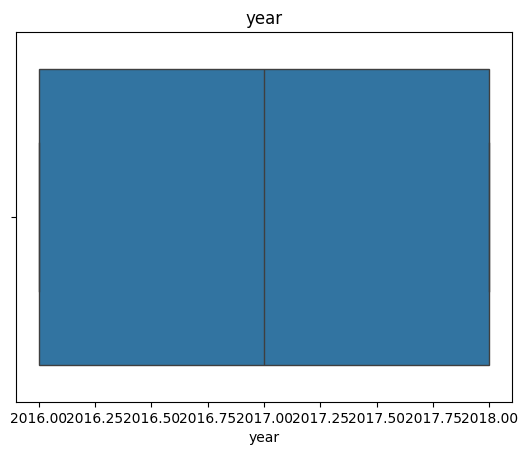

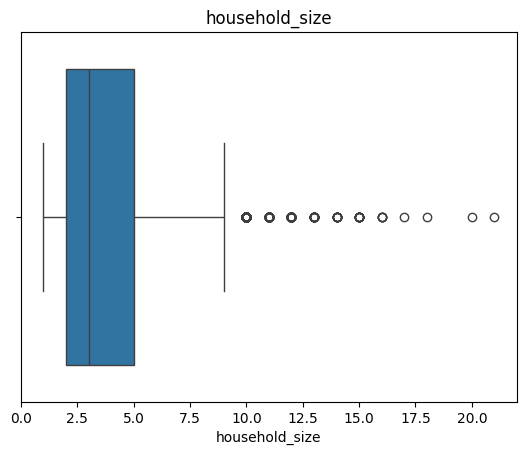

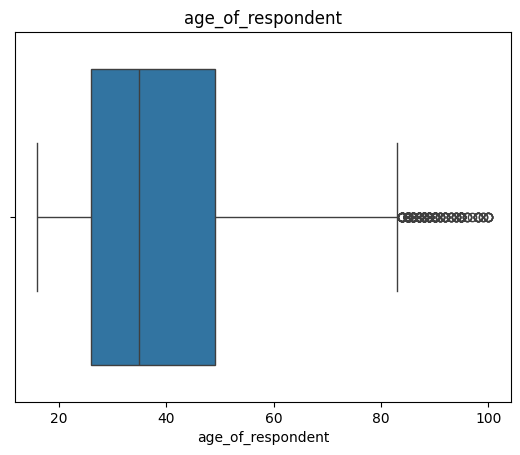

In [20]:
for i in data_num :
  sns.boxplot(data=df,x=i )
  plt.title(f'{i}' )
  plt.show()
#

In [31]:
for col in data_num :
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    mean_val = df[col].mean()

    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound),
                       mean_val,
                       df[col])

In [32]:
df = pd.get_dummies(df, columns=['country'])
df = pd.get_dummies(df, columns=['location_type'])
df = pd.get_dummies(df, columns=['cellphone_access'])
df = pd.get_dummies(df, columns=['gender_of_respondent'])
df['relationship_with_head'] = df['relationship_with_head'].map({'Head of Household':6 , 'Parent': 5,'Spouse':4,'Child': 3, 'Other relative': 2, 'Other non-relatives': 1})
df['marital_status'] = df['marital_status'].map({'Married/Living together':4 ,'Divorced/Seperated': 3,'Widowed':2,'Single/Never Married': 1, 'Dont know': 0})
df['education_level'] = df['education_level'].map({'Vocational/Specialised training':5 ,'Tertiary education':4,'Secondary education':3,'Primary education': 2, 'No formal education':1, 'Other/Dont know/RTA': 0})
df = pd.get_dummies(df, columns=['job_type'])
df['bank_account'] = df['bank_account'].map({'No':0 ,'Yes':1})


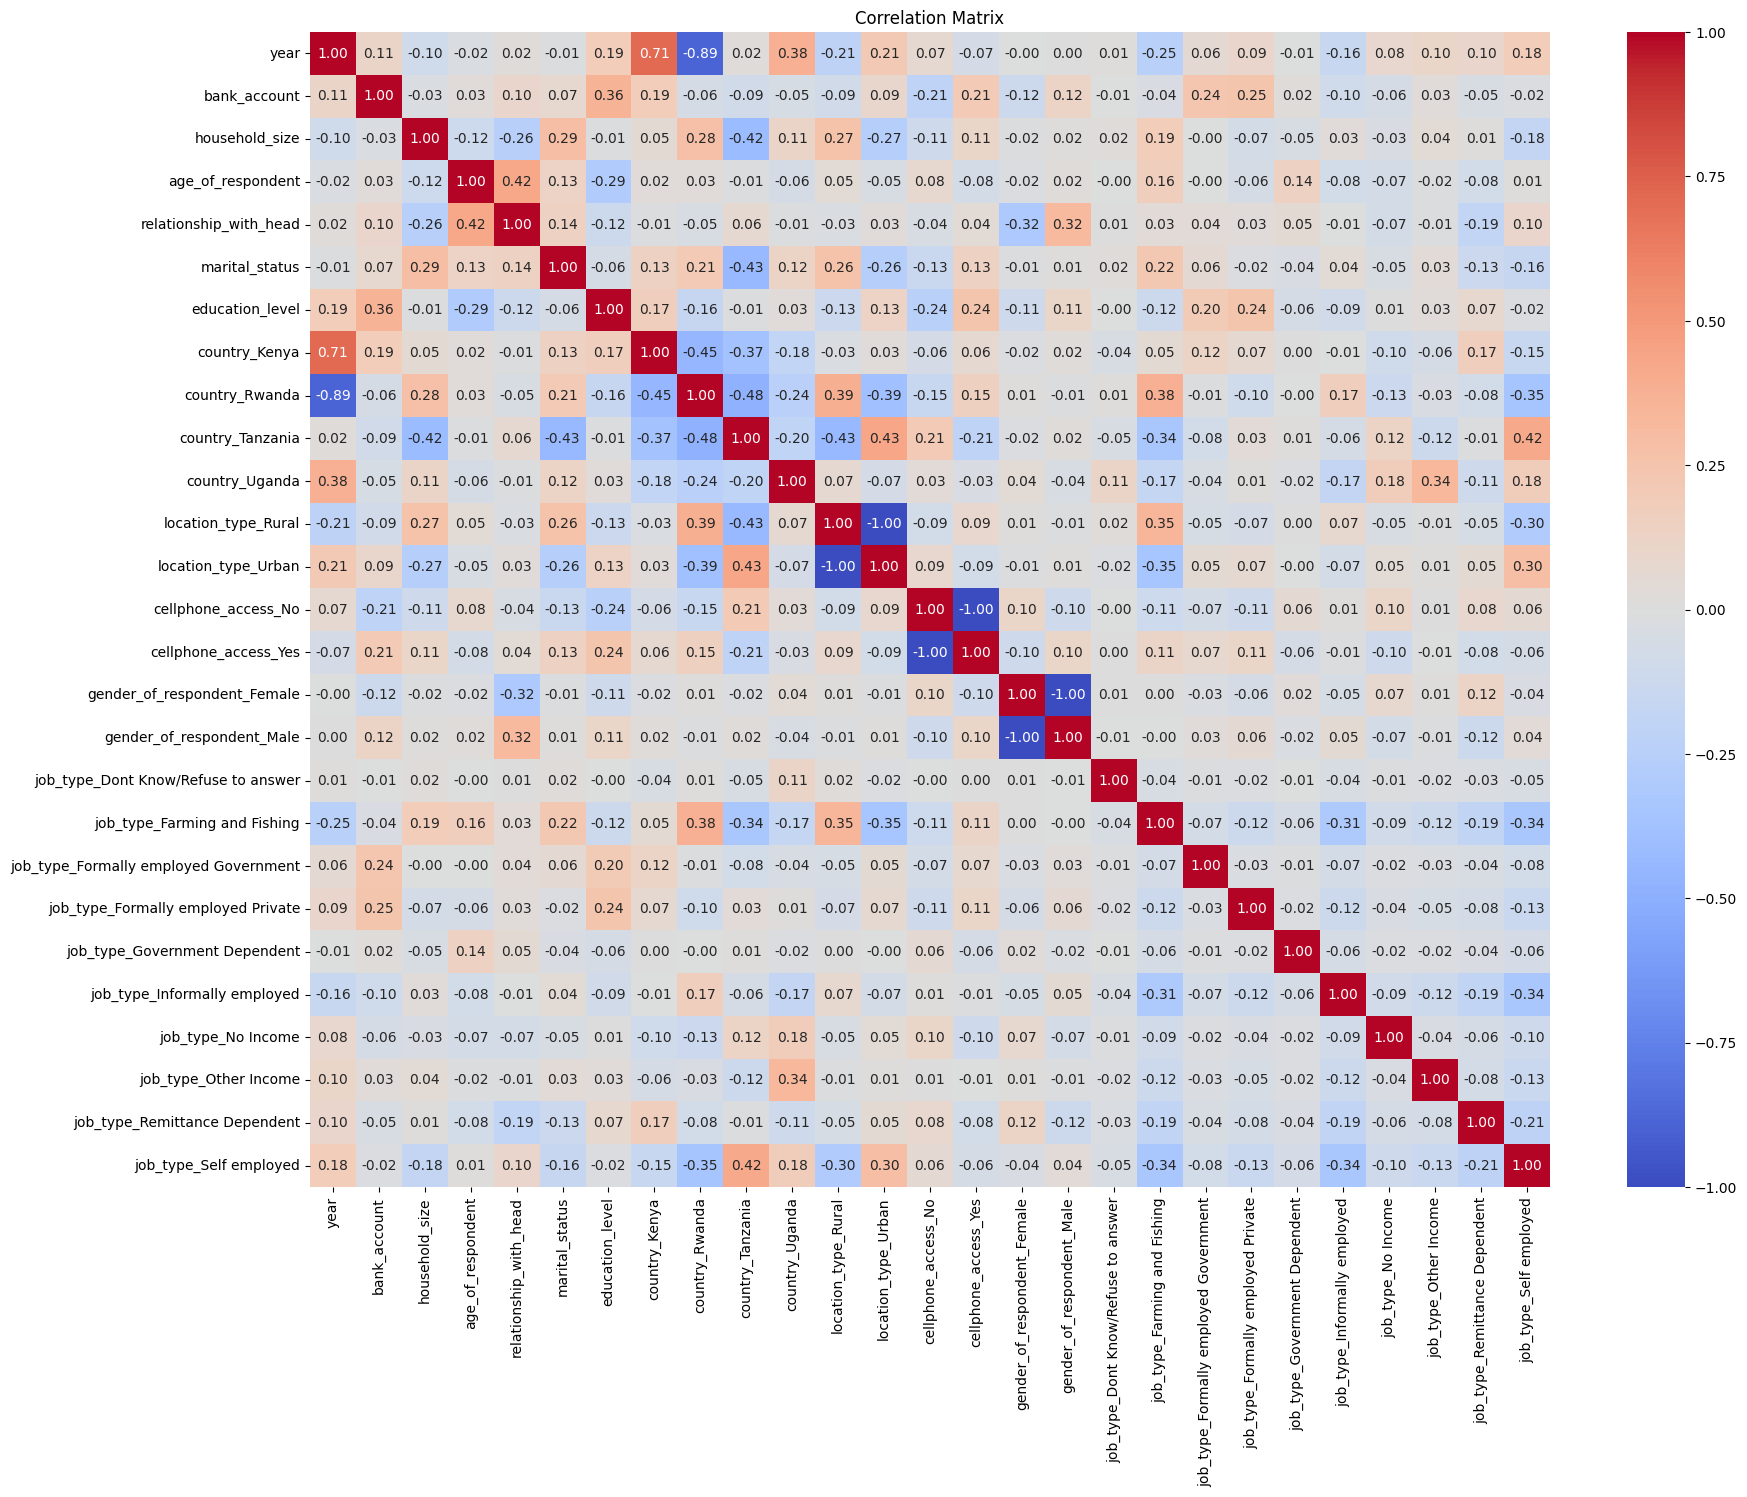

In [33]:
corr_matrix = df.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [38]:
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 27/27 [00:00<00:00, 100.70it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
df.drop_duplicates(inplace=True)

In [130]:
x = df.drop(['bank_account'],axis=1)
y = df['bank_account']
groups = df["year"]
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25,random_state=42,stratify=y)
#sm = SMOTE(random_state=42)
#X_train, y_train = sm.fit_resample(X_train, y_train)
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'class_weight': ['balanced', {0:1, 1:3}, {0:1, 1:5}]
}
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(solver='liblinear', random_state=42)

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC (CV):", grid_search.best_score_)


Best Parameters: {'C': 0.01, 'class_weight': {0: 1, 1: 3}, 'penalty': 'l2'}
Best ROC-AUC (CV): 0.8364784883346796


In [ ]:
model0 = LogisticRegression(C=0.01, class_weight= {0: 1, 1: 3},penalty= 'l2',solver='liblinear', random_state=42)
model0.fit(X_train,y_train)
y_pred0= model0.predict(X_test)
y_proba0 = model0.predict_proba(X_test)[:, 1]
print(accuracy_score(y_test,y_pred0))
print("ROC-AUC:", roc_auc_score(y_test, y_proba0))
print("PR-AUC:", average_precision_score(y_test, y_proba0))
print(classification_report(y_test, y_pred0))
print(confusion_matrix(y_test,y_pred0))
print("F1 (macro):", f1_score(y_test, y_pred0, average='macro'))
print("F1 (weighted):", f1_score(y_test, y_pred0, average='weighted'))

0.837009031716026
ROC-AUC: 0.842491547294943
PR-AUC: 0.5594090342486303
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      3972
           1       0.51      0.58      0.54       789

    accuracy                           0.84      4761
   macro avg       0.71      0.74      0.72      4761
weighted avg       0.85      0.84      0.84      4761

[[3524  448]
 [ 328  461]]
F1 (macro): 0.7219048754579549
F1 (weighted): 0.8415184991502306


In [ ]:
dt = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [5, 10, 15,20,25,30],
    'min_samples_split': [5, 10, 15,20,25,30],
    'min_samples_leaf': [1, 2, 5, 10,15],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

grid = GridSearchCV(dt, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.8522180171033169


In [ ]:
model1 = DecisionTreeClassifier(criterion='gini', max_depth= 25, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5,random_state=42)
model1.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)
y_proba1 = model1.predict_proba(X_test)[:, 1]
print(accuracy_score(y_test,y_pred1))
print("ROC-AUC:", roc_auc_score(y_test, y_proba1))
print("PR-AUC:", average_precision_score(y_test, y_proba1))
print(classification_report(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print("F1 (macro):", f1_score(y_test, y_pred1, average='macro'))
print("F1 (weighted):", f1_score(y_test, y_pred1, average='weighted'))

0.8296576349506406
ROC-AUC: 0.6955438704646086
PR-AUC: 0.3299095803898596
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      3972
           1       0.42      0.76      0.54       789

    accuracy                           0.78      4761
   macro avg       0.68      0.78      0.70      4761
weighted avg       0.86      0.78      0.81      4761

[[3667  305]
 [ 506  283]]
F1 (macro): 0.6557341004746486
F1 (weighted): 0.8193270704028646


In [ ]:
rf = RandomForestClassifier( random_state=42)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'class_weight': ['balanced', {0:1, 1:5}, {0:1, 1:10}]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best ROC-AUC:", random_search.best_score_)


Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10, 'class_weight': {0: 1, 1: 5}}
Best ROC-AUC: 0.8471922241328921


In [ ]:
model2 = RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf= 4, max_features= 'sqrt', max_depth= 10, class_weight={0: 1, 1: 5},random_state=42)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
y_proba2 = model2.predict_proba(X_test)[:, 1]
print(accuracy_score(y_test,y_pred2))
print("ROC-AUC:", roc_auc_score(y_test, y_proba2))
print("PR-AUC:", average_precision_score(y_test, y_proba2))
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))
print("F1 (macro):", f1_score(y_test, y_pred2, average='macro'))
print("F1 (weighted):", f1_score(y_test, y_pred2, average='weighted'))

0.7901701323251418
ROC-AUC: 0.8574420499899805
PR-AUC: 0.5939794595532825
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      3972
           1       0.42      0.73      0.54       789

    accuracy                           0.79      4761
   macro avg       0.68      0.77      0.70      4761
weighted avg       0.85      0.79      0.81      4761

[[3184  788]
 [ 211  578]]
F1 (macro): 0.7004110951924885
F1 (weighted): 0.8100438715521338


In [ ]:
model3= SVC(probability=True,C= 1,random_state=42)  # probability=True needed for ROC/PR
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
y_proba3 = model3.predict_proba(X_test)[:, 1]
print(accuracy_score(y_test,y_pred3))
print("ROC-AUC:", roc_auc_score(y_test, y_proba3))
print("PR-AUC:", average_precision_score(y_test, y_proba3))
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))
print("F1 (macro):", f1_score(y_test, y_pred3, average='macro'))
print("F1 (weighted):", f1_score(y_test, y_pred3, average='weighted'))

0.8659945389624029
ROC-AUC: 0.7870875596858619
PR-AUC: 0.45522390490702136
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      3972
           1       0.76      0.28      0.41       789

    accuracy                           0.87      4761
   macro avg       0.82      0.63      0.67      4761
weighted avg       0.85      0.87      0.84      4761

[[3902   70]
 [ 568  221]]
F1 (macro): 0.666842375424465
F1 (weighted): 0.8390513774731627


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train , y_train)
y_pred4 = knn.predict(X_test)
y_proba4 = knn.predict_proba(X_test)[:, 1]
print(accuracy_score(y_test,y_pred4))
print("ROC-AUC:", roc_auc_score(y_test, y_proba4))
print("PR-AUC:", average_precision_score(y_test, y_proba4))
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test,y_pred4))
print("F1 (macro):", f1_score(y_test, y_pred4, average='macro'))
print("F1 (weighted):", f1_score(y_test, y_pred4, average='weighted'))

0.8533921445074564
ROC-AUC: 0.8066819447156712
PR-AUC: 0.48152743638379353
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3972
           1       0.60      0.33      0.43       789

    accuracy                           0.85      4761
   macro avg       0.74      0.65      0.67      4761
weighted avg       0.83      0.85      0.84      4761

[[3800  172]
 [ 526  263]]
F1 (macro): 0.6728109537379666
F1 (weighted): 0.8353187089597043


In [ ]:
base_learners = [
    ('lr', LogisticRegression(C=0.01, class_weight= {0: 1, 1: 3},penalty= 'l2',solver='liblinear', random_state=42)),
    ('dt',DecisionTreeClassifier(criterion='gini', max_depth= 25, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5,random_state=42)),
    ('rf',RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf= 4, max_features= 'sqrt', max_depth= 10, class_weight={0: 1, 1: 5},random_state=42)),
    ('svm',SVC(probability=True,C= 1,random_state=42)),
    ('knn',KNeighborsClassifier(n_neighbors=9))
    ]
# Meta-learner (usually Logistic Regression is a solid choice)
meta_learner = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Stacking
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5,
    passthrough=False  # Start with False
)

stack_model.fit(X_train, y_train)



In [ ]:
y_pred = stack_model.predict(X_test)
y_prob = stack_model.predict_proba(X_test)[:,1]
print(accuracy_score(y_test,y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("PR-AUC:", average_precision_score(y_test, y_prob))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print("F1 (macro):", f1_score(y_test, y_pred, average='macro'))
print("F1 (weighted):", f1_score(y_test, y_pred, average='weighted'))

0.7834488552825036
ROC-AUC: 0.8406615637727718
PR-AUC: 0.5493995599370514
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      3972
           1       0.42      0.76      0.54       789

    accuracy                           0.78      4761
   macro avg       0.68      0.78      0.70      4761
weighted avg       0.86      0.78      0.81      4761

[[3128  844]
 [ 187  602]]
F1 (macro): 0.6986088124203901
F1 (weighted): 0.8055153272383265


In [137]:
print('✅ Best Overall → Random Forest\nBest PR-AUC (0.594) and good recall (0.73).\nHandles imbalance naturally better than single tree.\n✅ Best Simple Model → Logistic Regression\nSlightly weaker recall (0.58) but interpretable and fast.\n⚠️ If we care onlys only about predecting class 1 → Stacked Model\nHighest recall (0.76), but precision weaker (more false alarms).\n❌ SVM & KNN not useful → They miss most churners.\n❌ Decision Tree → Recall ok, but too many false positives (PR-AUC too low).')

✅ Best Overall → Random Forest
Best PR-AUC (0.594) and good recall (0.73).
Handles imbalance naturally better than single tree.
✅ Best Simple Model → Logistic Regression
Slightly weaker recall (0.58) but interpretable and fast.
⚠️ If we care onlys only about predecting class 1 → Stacked Model
Highest recall (0.76), but precision weaker (more false alarms).
❌ SVM & KNN not useful → They miss most churners.
❌ Decision Tree → Recall ok, but too many false positives (PR-AUC too low).


In [ ]:
pickle.dump(model2, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))